In [80]:
# Libraries
from waveome.model_search import GPKernelSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [81]:
import pandas as pd

metadata = pd.read_csv('metadata.csv')
microbiome = pd.read_csv('microbiome.csv')

df = pd.DataFrame(
    {
        'sample_id': metadata['Sample_Id'],
        'sample_name': metadata['Sample_name'],
        'time': metadata['Time'],
        'chemistry': metadata['chemistry'],
        'outcome1': microbiome['Abiotrophia_defectiva_ATCC_49176'],
        'outcome2': microbiome['Acanthamoeba_castellanii'],
        'outcome3': microbiome['Acanthamoeba_polyphaga_mimivirus']
    }
).sort_values(['sample_id', 'time'])

print(f'Dimension of dataset: {df.shape}')

df.head()

Dimension of dataset: (42, 7)


,sample_id,sample_name,time,chemistry,outcome1,outcome2,outcome3
0,1,HOT194_25m,0,flex,12,0,39
1,2,HOT195_25m,30,flex,7,1,51
2,3,HOT196_25m,57,flex,6,0,15
3,4,HOT197_25m,117,flex,10,0,54
4,5,HOT198_25m,136,flex,4,0,27


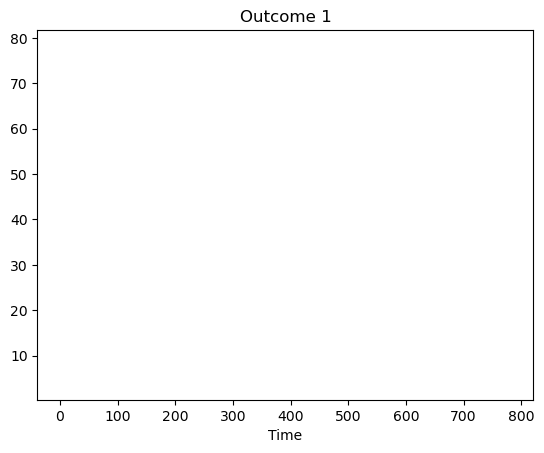

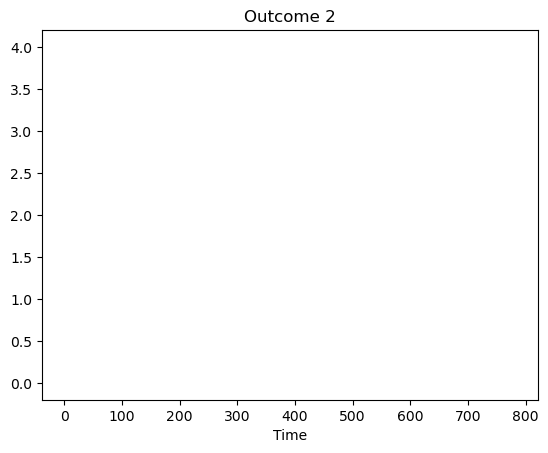

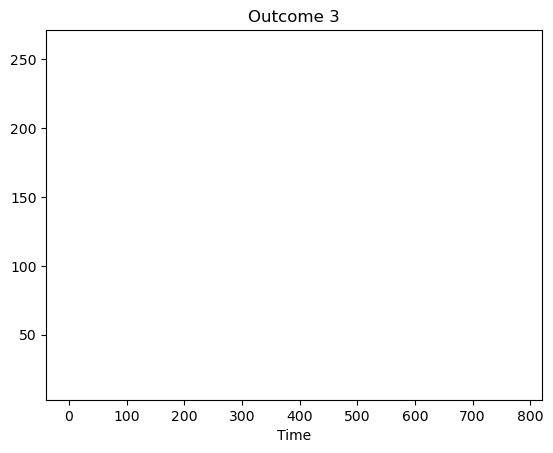

In [82]:
for out in range(1, 4):
    for i in df.sample_id.unique():
        plt.plot(df.loc[df.sample_id == i, 'time'], df.loc[df.sample_id == i, 'outcome'+str(out)])
    plt.title(f'Outcome {out}')
    plt.xlabel('Time')
    plt.show()

In [83]:
# Load the information into the Gaussian process search object
gps = GPKernelSearch(
    X=df[['sample_id', 'time', 'chemistry']],
    Y=df[['outcome1', 'outcome2', 'outcome3']],
    unit_col= 'sample_id',
    categorical_vars=['chemistry'],
    outcome_likelihood='gaussian'
)

In [84]:
gps.run_search(
    random_seed=9102
)

Kernel search: 100%|██████████| 3/3 [01:15<00:00, 25.10s/it]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# gps.models["outcome1"]

In [ ]:
# Now after the search is finished we can inspect the
# additive components selected for each outcome
gps.plot_parts(
    out_label='outcome1',
    x_axis_label='time'
);

In [ ]:
gps.plot_parts(
    out_label='outcome2',
    x_axis_label='time'
);

In [ ]:
gps.plot_parts(
    out_label='outcome3',
    x_axis_label='time'
);

In [ ]:
# Plot some of the posterior mean functions for individuals in the dataset
# This is done with the unit_label argument
gps.plot_marginal(
    out_label='outcome2',
    x_axis_label='time',
    unit_label=0
)

gps.plot_marginal(
    out_label='outcome2',
    x_axis_label='time',
    unit_label=2
)

In [ ]:
gps.plot_heatmap(var_cutoff=0.1);